In [412]:
import pandas as pd
import numpy as np

In [413]:
# [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측 (자유롭게)..

# ** 특성 이름을 담고 있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key 값 = target_names
#     - 범주는 'class_0'과 'class_1'만 사용 (0과 1로 변경하여 사용)
#     - (0 = 레드와인, 1 = 화이트와인)

# 알콜(Alcohol)
# 말산(Malic acid)
# 화분(Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenols)
# 플라보노이드 폴리페놀(Flavanoids)
# 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intensity)
# 색상(Hue)
# 희석 와인의 OD280/OD315 비율(OD280/OD315 of diluted wines)
# 프롤린(Proline)

##### - [지금까지 배운 모든 분류모델] 적용해보기
##### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해 보기
##### - ..........(특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
##### - ..........(전체 특성을 모두 적용도 해보세요)
##### - 사용한 모델별로, 예측(predict) 을 통한 결과를, 데이터프레임에 col_predict 컬럼명으로 추가하기

In [451]:
from sklearn.datasets import load_wine

wine_all = load_wine()
print(wine_all)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [452]:
df_input_temp = pd.DataFrame(wine_all['data'])
df_input_temp.columns = wine_all['feature_names']
df_input_temp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [453]:
Sr_target_temp = pd.Series(wine_all['target'])
Sr_target = Sr_target_temp[Sr_target_temp != 2]
Sr_target

0      0
1      0
2      0
3      0
4      0
      ..
125    1
126    1
127    1
128    1
129    1
Length: 130, dtype: int32

In [454]:
df_input = df_input_temp[Sr_target_temp != 2]
df_input

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0


In [455]:
df = pd.concat([df_input, Sr_target], axis = 1)
df['class'] = df[0]
df = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', \
      'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', \
      'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'class']]
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [456]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.021014,0.190818,-0.461771,0.330544,0.485061,0.543729,-0.301314,0.190869,0.741935,0.026162,0.290491,0.756168,-0.824399
malic_acid,0.021014,1.000000,0.121625,0.141753,-0.016360,0.030038,0.057852,0.055669,0.136454,-0.108202,-0.408645,0.166457,-0.107553,-0.044302
ash,0.190818,0.121625,1.000000,0.369136,0.306593,0.254490,0.377025,0.179396,0.077778,0.253347,0.041164,0.214496,0.304101,-0.354548
alcalinity_of_ash,-0.461771,0.141753,0.369136,1.000000,-0.123546,-0.228873,-0.180189,0.335042,-0.096965,-0.433335,-0.035805,-0.000632,-0.427021,0.470437
magnesium,0.330544,-0.016360,0.306593,-0.123546,1.000000,0.304089,0.255309,-0.212922,0.278018,0.345495,0.071684,0.130838,0.426982,-0.383085
total_phenols,0.485061,0.030038,0.254490,-0.228873,0.304089,1.000000,0.846509,-0.444721,0.444117,0.590428,-0.008302,0.494673,0.506179,-0.532692
flavanoids,0.543729,0.057852,0.377025,-0.180189,0.255309,0.846509,1.000000,-0.358804,0.542889,0.707064,-0.006622,0.537528,0.545781,-0.610730
nonflavanoid_phenols,-0.301314,0.055669,0.179396,0.335042,-0.212922,-0.444721,-0.358804,1.000000,-0.337243,-0.280354,0.051340,-0.468611,-0.330049,0.337489
proanthocyanins,0.190869,0.136454,0.077778,-0.096965,0.278018,0.444117,0.542889,-0.337243,1.000000,0.272754,-0.010739,0.342529,0.274927,-0.249205
color_intensity,0.741935,-0.108202,0.253347,-0.433335,0.345495,0.590428,0.707064,-0.280354,0.272754,1.000000,0.009784,0.208163,0.775315,-0.750613


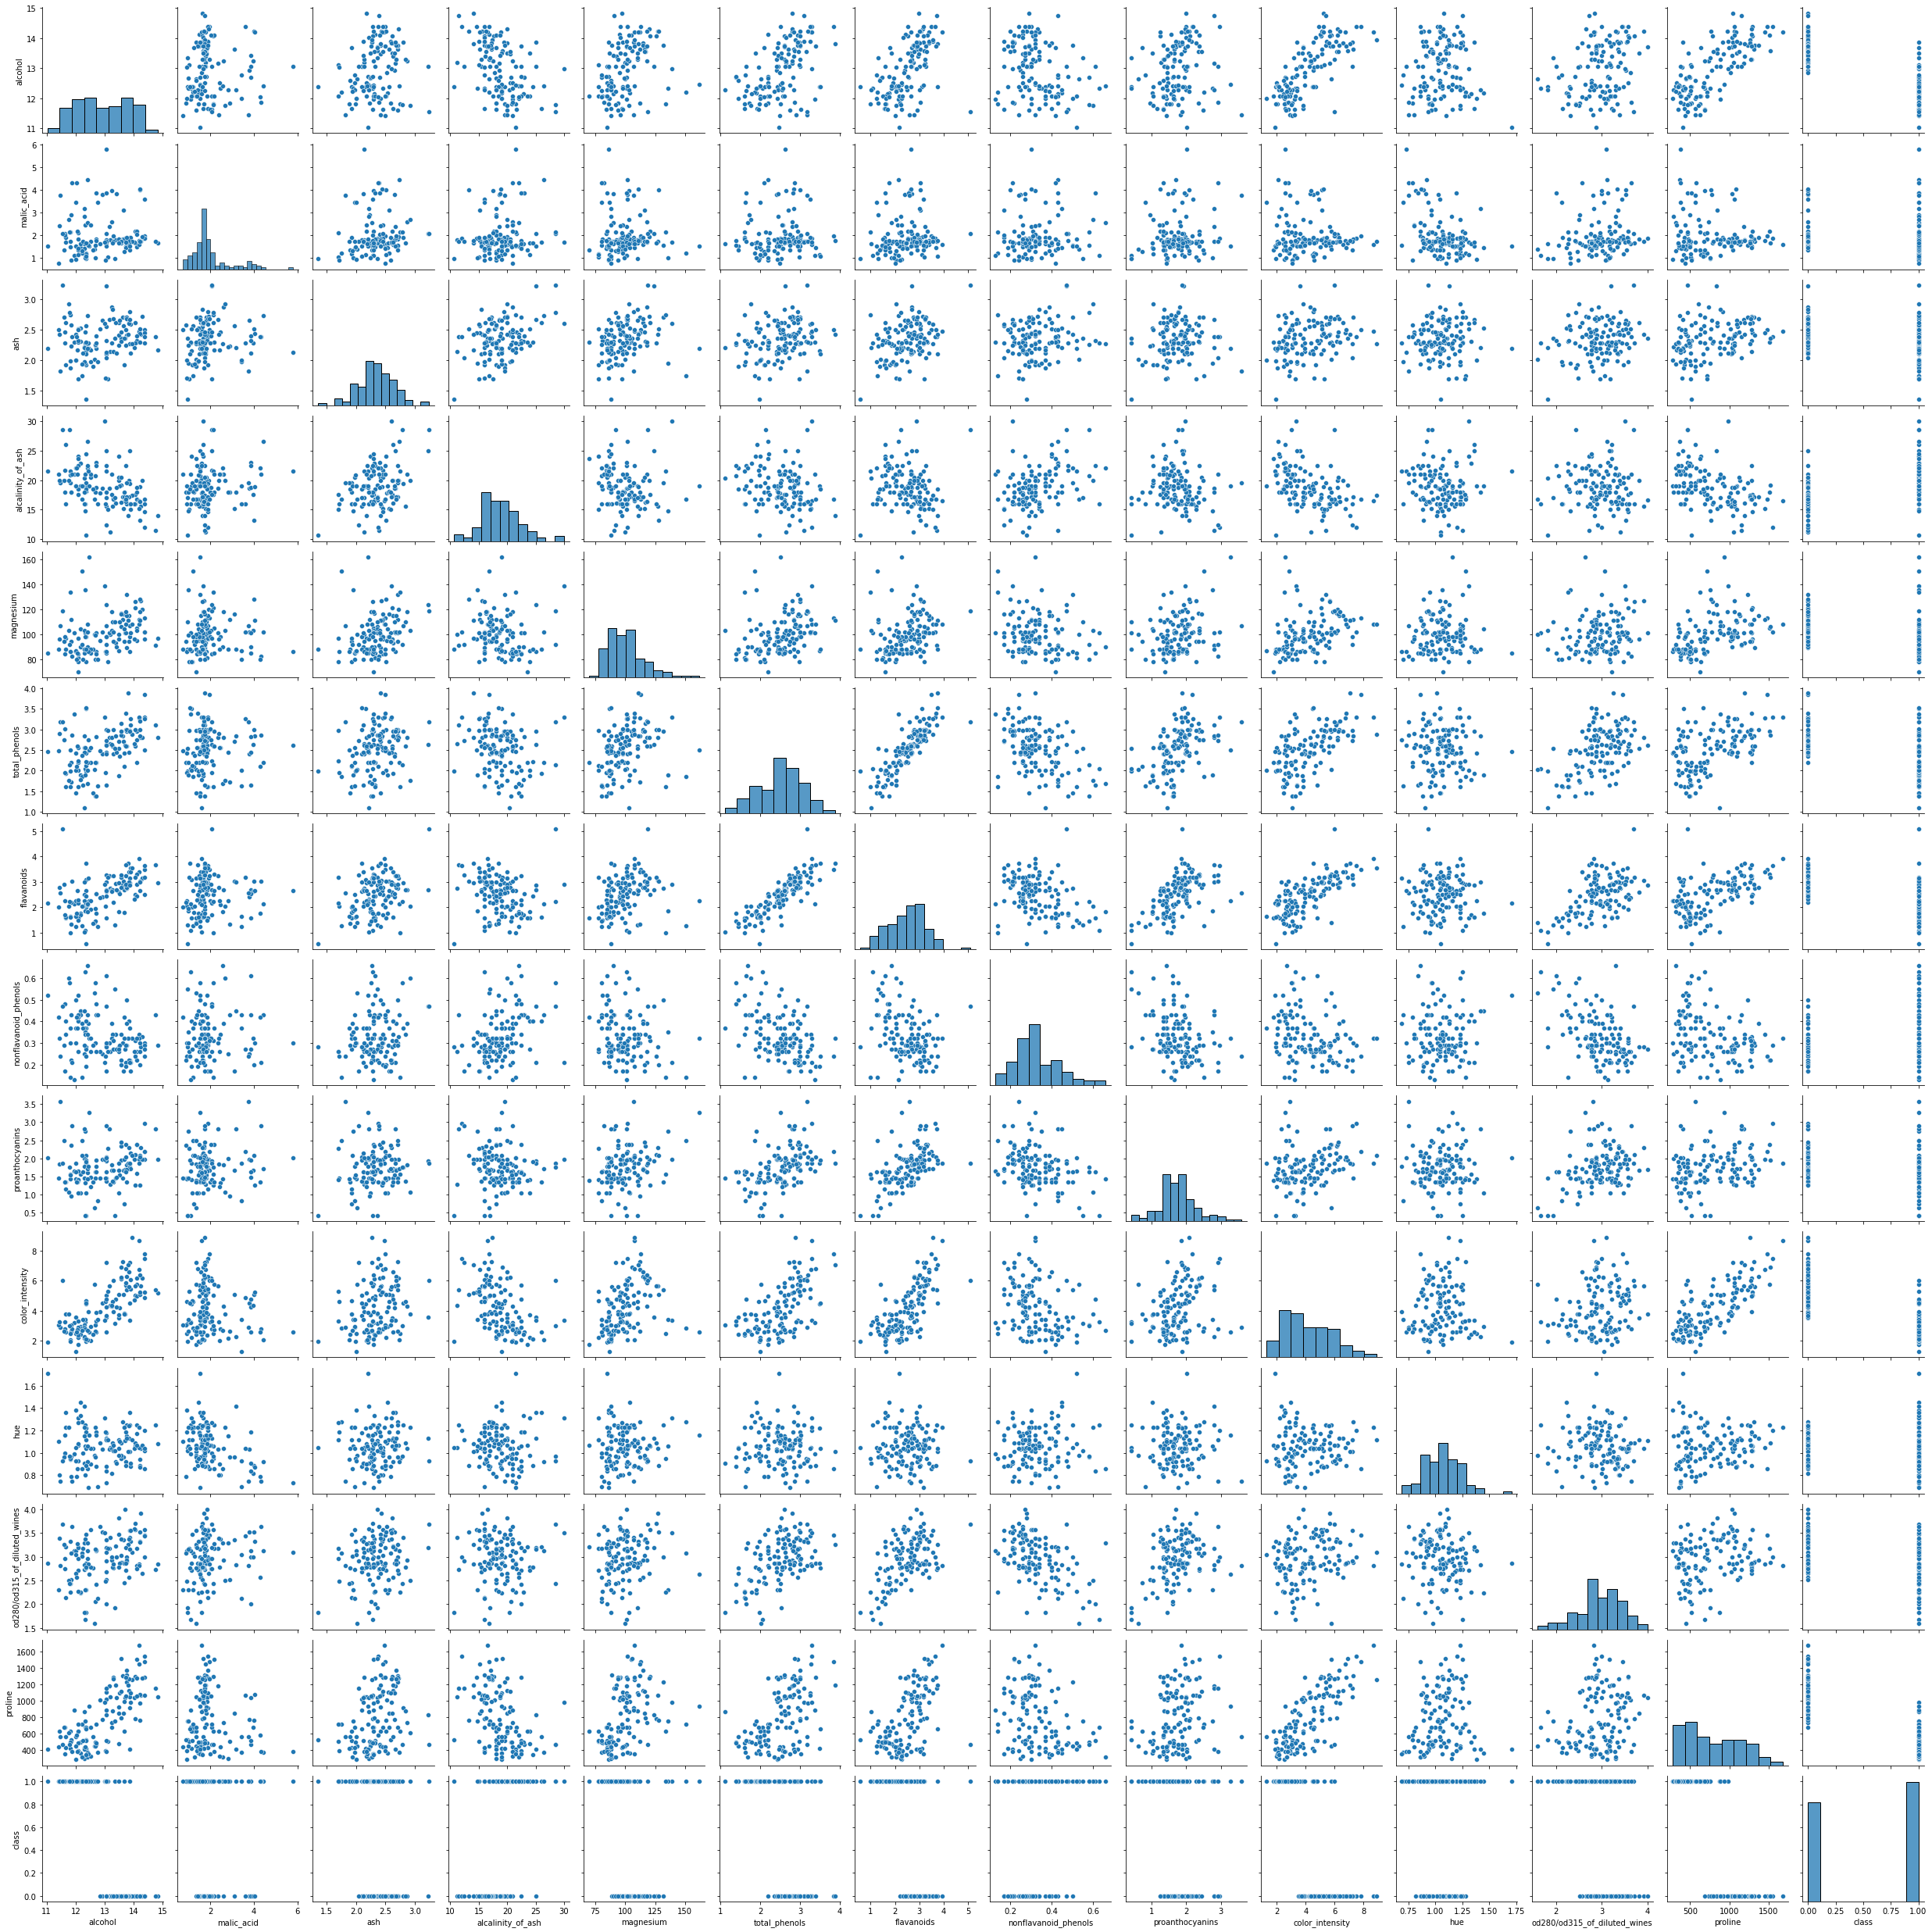

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

In [457]:
# array 형태로 만들기
wine_input = df_input.to_numpy()
wine_target = Sr_target.to_numpy()

In [458]:
# 학습, 테스트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(wine_input, wine_target, random_state = 9999)

In [459]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## k-최근접이웃 분류

In [424]:
from sklearn.neighbors import KNeighborsClassifier

In [425]:
kn_score = []

for n in range(1, 50):
    kn = KNeighborsClassifier(n_neighbors = n)
    kn.fit(train_scaled, train_target)
    a = kn.score(train_scaled, train_target)
    b = kn.score(test_scaled, test_target)
    c = a - b
    if c > 0:
        kn_score.append([n, a, b, c])
    
kn_score

[[1, 1.0, 0.9090909090909091, 0.09090909090909094],
 [2, 0.9690721649484536, 0.9090909090909091, 0.059981255857544546],
 [3, 0.9896907216494846, 0.9090909090909091, 0.08059981255857551],
 [4, 0.9690721649484536, 0.9090909090909091, 0.059981255857544546],
 [5, 0.9896907216494846, 0.9090909090909091, 0.08059981255857551],
 [6, 0.9690721649484536, 0.9090909090909091, 0.059981255857544546],
 [7, 0.979381443298969, 0.9090909090909091, 0.07029053420805997],
 [8, 0.9690721649484536, 0.8787878787878788, 0.09028428616057482],
 [9, 0.979381443298969, 0.8787878787878788, 0.10059356451109025],
 [10, 0.979381443298969, 0.8787878787878788, 0.10059356451109025],
 [11, 0.979381443298969, 0.8787878787878788, 0.10059356451109025],
 [12, 0.979381443298969, 0.8787878787878788, 0.10059356451109025],
 [13, 0.979381443298969, 0.8787878787878788, 0.10059356451109025],
 [14, 0.9690721649484536, 0.8787878787878788, 0.09028428616057482],
 [15, 0.9690721649484536, 0.8787878787878788, 0.09028428616057482],
 [16, 0

In [426]:
# n_neighbors = 21일때, 가장 최적
# 학습데이터 정확도 = 0.9587628865979382
# 테스트데이터 정확도 = 0.9393939393939394
# 정확도 간의 차이 = 0.019368947203998732

## 로지스틱회귀 이진분류

In [427]:
from sklearn.linear_model import LogisticRegression

In [428]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

1.0
0.9696969696969697


In [429]:
lr_score = []

for n in range(1,300):
    lr = LogisticRegression(C = n, max_iter = 10000)
    lr.fit(train_scaled, train_target)
    a = lr.score(train_scaled, train_target)
    b = lr.score(test_scaled, test_target)
    c = a - b
    
    lr_score.append([n, a, b, c])
    
lr_score

[[1, 1.0, 0.9696969696969697, 0.030303030303030276],
 [2, 1.0, 1.0, 0.0],
 [3, 1.0, 1.0, 0.0],
 [4, 1.0, 1.0, 0.0],
 [5, 1.0, 1.0, 0.0],
 [6, 1.0, 1.0, 0.0],
 [7, 1.0, 1.0, 0.0],
 [8, 1.0, 1.0, 0.0],
 [9, 1.0, 1.0, 0.0],
 [10, 1.0, 1.0, 0.0],
 [11, 1.0, 1.0, 0.0],
 [12, 1.0, 1.0, 0.0],
 [13, 1.0, 1.0, 0.0],
 [14, 1.0, 1.0, 0.0],
 [15, 1.0, 1.0, 0.0],
 [16, 1.0, 1.0, 0.0],
 [17, 1.0, 1.0, 0.0],
 [18, 1.0, 1.0, 0.0],
 [19, 1.0, 1.0, 0.0],
 [20, 1.0, 1.0, 0.0],
 [21, 1.0, 1.0, 0.0],
 [22, 1.0, 1.0, 0.0],
 [23, 1.0, 1.0, 0.0],
 [24, 1.0, 1.0, 0.0],
 [25, 1.0, 1.0, 0.0],
 [26, 1.0, 1.0, 0.0],
 [27, 1.0, 1.0, 0.0],
 [28, 1.0, 1.0, 0.0],
 [29, 1.0, 1.0, 0.0],
 [30, 1.0, 1.0, 0.0],
 [31, 1.0, 1.0, 0.0],
 [32, 1.0, 1.0, 0.0],
 [33, 1.0, 1.0, 0.0],
 [34, 1.0, 1.0, 0.0],
 [35, 1.0, 1.0, 0.0],
 [36, 1.0, 1.0, 0.0],
 [37, 1.0, 1.0, 0.0],
 [38, 1.0, 1.0, 0.0],
 [39, 1.0, 1.0, 0.0],
 [40, 1.0, 1.0, 0.0],
 [41, 1.0, 1.0, 0.0],
 [42, 1.0, 1.0, 0.0],
 [43, 1.0, 1.0, 0.0],
 [44, 1.0, 1.0, 0.0],
 [45, 1.0

In [430]:
wine_scaled = ss.transform(wine_input)
lr.predict(wine_scaled)
sum(df['class'] == lr.predict(wine_scaled))

130

In [431]:
# 전부 100점
# 규제강도를 조절하면서 해보았으나 정확도가 전부 1
# 기존 데이터를 가지고 예측까지 해보았으나 전부 정답이었음
# 시간이 남으면 특성을 바꿔가면서 다시 분석

## 확률적경사하강법

In [432]:
from sklearn.linear_model import SGDClassifier

In [433]:
sc = SGDClassifier(loss='log_loss')

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

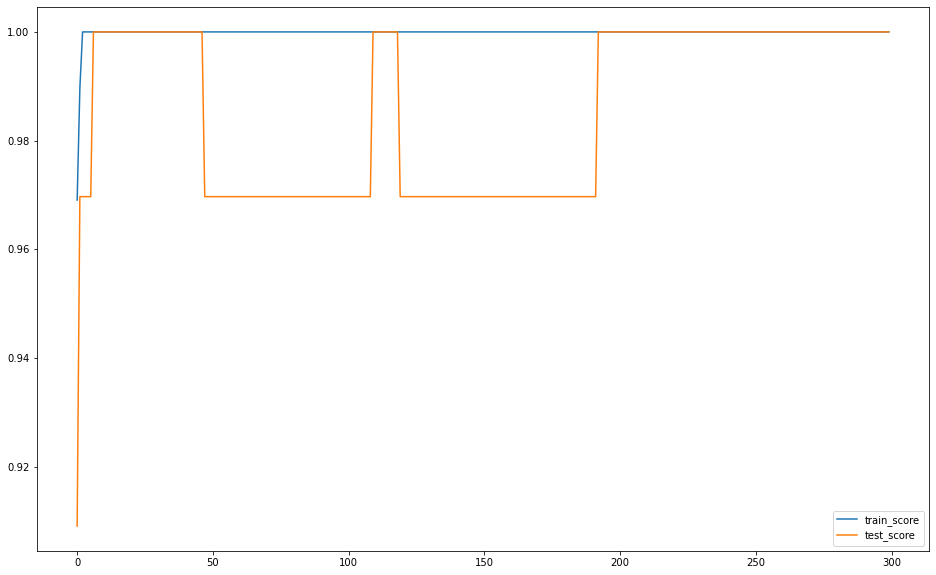

In [434]:
# 최적의 에포크 찾기
plt.figure(figsize=(16,10))
plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.legend()
plt.show()

In [435]:
sc = SGDClassifier(loss='log_loss', max_iter = 250, tol = None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9696969696969697


In [436]:
sc.predict(wine_scaled)
sum(df['class'] == sc.predict(wine_scaled))

129

In [437]:
# 에포크 값이 250일때,
# 학습데이터와 테스트데이터의 정확도 모두 1.0으로 매우 우수
# 기존 데이터를 가지고 예측까지 해보았으나 전부 정답이었음

## 결정트리

In [438]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [439]:
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.9696969696969697


In [440]:
input_cols = df_input.columns
input_cols.sort_values()

Index(['alcalinity_of_ash', 'alcohol', 'ash', 'color_intensity', 'flavanoids',
       'hue', 'magnesium', 'malic_acid', 'nonflavanoid_phenols',
       'od280/od315_of_diluted_wines', 'proanthocyanins', 'proline',
       'total_phenols'],
      dtype='object')

In [441]:
dt.feature_importances_

array([0.03007653, 0.        , 0.        , 0.        , 0.        ,
       0.04991424, 0.        , 0.        , 0.        , 0.11646655,
       0.        , 0.        , 0.80354268])

In [442]:
# 영향을 미치는 값이 0인 독립변수 = [alcohol, ash, color_intensity, flavanoids,
#                                    hue, magnesium, malic_acid, nonflavanoid_phenols,
#                                    proanthocyanins, proline]
# 영향을 주는 독립변수 = [alcalinity_of_ash, od280/od315_of_diluted_wines, total_phenols]

In [443]:
# 영향이 작은 변수 제외
wine_input_sl = df_input[['alcalinity_of_ash', 'od280/od315_of_diluted_wines', 'total_phenols']].to_numpy()
train_input, test_input, train_target, test_target = \
train_test_split(wine_input_sl, wine_target, random_state = 9999)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 결정나무 모델
dt = DecisionTreeClassifier(random_state = 9999)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.score(train_scaled, train_target) - dt.score(test_scaled, test_target))

1.0
0.8181818181818182
0.18181818181818177


In [444]:
# 과적합이 발생 
# max_depth값을 변경하여 다시 분석

In [468]:
for i in range(1, 10):
        dt = DecisionTreeClassifier(max_depth = i, random_state = 9999)
        dt.fit(train_scaled, train_target)
        print('max_depth =', i)
        print(dt.score(train_scaled, train_target))
        print(dt.score(test_scaled, test_target))
        print(dt.score(train_scaled, train_target) - dt.score(test_scaled, test_target))
        print('\n')

max_depth = 1
0.9484536082474226
0.9696969696969697
-0.021243361449547082


max_depth = 2
0.979381443298969
1.0
-0.020618556701030966


max_depth = 3
1.0
1.0
0.0


max_depth = 4
1.0
1.0
0.0


max_depth = 5
1.0
1.0
0.0


max_depth = 6
1.0
1.0
0.0


max_depth = 7
1.0
1.0
0.0


max_depth = 8
1.0
1.0
0.0


max_depth = 9
1.0
1.0
0.0




In [446]:
# max_depth가 4일때,
# 학습데이터 정확도가 0.9072164948453608
# 테스트데이터 정확도가 0.8484848484848485
# 학습데이터와 테스트데이터의 정확도간의 차가 0.05873164636051231
# 정확도가 좋은편이면서 정확도간의 차도 낮은편이었습니다.
# 아직 과대적합이 조금 남아있는 편이지만 결정나무 모델을 사용한다면
# max_depth를 4로 하는 것이 가장 적합합니다.

## 각 모델별 예측값 데이터프레임에 추가

In [460]:
df['kn_pred'] = kn.predict(wine_scaled)
df['lr_pred'] = lr.predict(wine_scaled)
df['sc_pred'] = sc.predict(wine_scaled)

In [466]:
wine_input_sl = df_input[['alcalinity_of_ash', 'od280/od315_of_diluted_wines', 'total_phenols']].to_numpy()
ss.fit(wine_input_sl)
wine_scale_sl = ss.transform(wine_input_sl)

In [469]:
df['dt_pred'] = dt.predict(wine_scaled)

In [470]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,kn_pred,lr_pred,sc_pred,dt_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1,1,1,1,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1,1,1,1,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1,1,1,1,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1,1,1,1,1


## 결론

In [448]:
## k-최근접이웃 분류모델
# n_neighbors = 21일때, 가장 최적
# 학습데이터 정확도 = 0.9587628865979382
# 테스트데이터 정확도 = 0.9393939393939394
# 정확도 간의 차이 = 0.019368947203998732

## 로지스틱회귀 이진분류모델
# 규제강도를 조절하면서 해보았으나 정확도가 모두 1.0으로 매우 우수
# 기존 데이터를 가지고 예측까지 해보았으나 전부 정답이었음

## 확률적경사하강법
# 에포크 값이 250일때,
# 학습데이터와 테스트데이터의 정확도 모두 1.0으로 매우 우수
# 기존 데이터를 가지고 예측까지 해보았으나 전부 정답이었음

## 결정나무 모델
# 모든 독립변수를 포함해서 분석했을땐 정확도가 모두 1.0으로 매우 우수
# feature_importance를 이용하여 영향이 없는 독립변수를 제외
# max_depth가 4일때,
# 학습데이터 정확도가 0.9072164948453608
# 테스트데이터 정확도가 0.8484848484848485
# 학습데이터와 테스트데이터의 정확도간의 차가 0.05873164636051231
# 아직 과대적합이 조금 남아있음

## 결론
# 로지스틱회귀 이진분류모델, 확률적경사하강법, 결정나무 모델
# 모두 정확도가 1.0으로 매우 우수한 모델이기때문에 
# 컴퓨터에 부하가 적고, 처리속도가 빠른 모델을 선택
# 다만 모델 학습이 잘못되었을 수 있기 때문에
# 특성을 늘려서 다시 학습하거나
# 데이터를 섞어서 다시 분석을 진행 해볼 필요가 있음